# Data Exploration

## Introduction

Data exploration helps us to understand what our dataset even contains. We will also be on the lookout for any irregularities but also patterns we might encounter.

# Implementation

Time to get out pandas, numpy and matplotlib and get at it

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
# read csv
data = pd.read_pickle("./datasets/All.pickle")
data.index = pd.DatetimeIndex(data.DateTime)
data.head()

,NO2-ug-per-m3,Cars-Direction-1,Cars-Direction-2,Cars-Total,Day-Of-Week,Monday,Tuesday,Wednesday,Thursday,Friday,...,Number of vessels,DateTime,DaySin,DayCos,WeekSin,WeekCos,MonthSin,MonthCos,YearSin,YearCos
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,19.0,36,62,98,2,0,1,0,0,0,...,6,2019-01-01 00:00:00,0.000000,1.000000,0.781831,0.62349,0.201299,0.97953,0.017213,0.999852
2019-01-01 01:00:00,11.0,109,112,221,2,0,1,0,0,0,...,4,2019-01-01 01:00:00,0.258819,0.965926,0.781831,0.62349,0.201299,0.97953,0.017213,0.999852
2019-01-01 02:00:00,9.0,97,60,157,2,0,1,0,0,0,...,2,2019-01-01 02:00:00,0.500000,0.866025,0.781831,0.62349,0.201299,0.97953,0.017213,0.999852
2019-01-01 03:00:00,7.0,60,44,104,2,0,1,0,0,0,...,4,2019-01-01 03:00:00,0.707107,0.707107,0.781831,0.62349,0.201299,0.97953,0.017213,0.999852
2019-01-01 04:00:00,8.0,44,33,77,2,0,1,0,0,0,...,3,2019-01-01 04:00:00,0.866025,0.500000,0.781831,0.62349,0.201299,0.97953,0.017213,0.999852


The prime correlation we are looking for is between NO2 and cars. A colored scatterplot can help here.

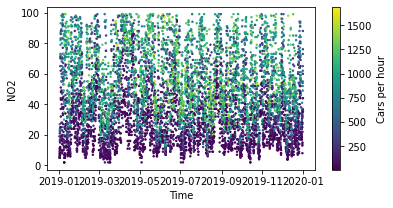

'(Color: cars total) NO2 correlates with cars'

In [108]:
plt.figure(figsize=(6,3))
plt.scatter(data["DateTime"], data["NO2-ug-per-m3"], s=2, c=data["Cars-Total"])
plt.xlabel("Time")
plt.ylabel("NO2")
cb = plt.colorbar()
cb.set_label("Cars per hour")
plt.show()
display("(Color: cars total) NO2 correlates with cars")

As we can see, the dataset contains no gaps that would be visible at this scale. Measurements where the level of NO2 is high seem to be correlated with a high number of cars passing per hour, but that also doesn't seem to be the whole story. Lets look more closely at the daily distribution of cars and NO2.

<Figure size 432x216 with 0 Axes>

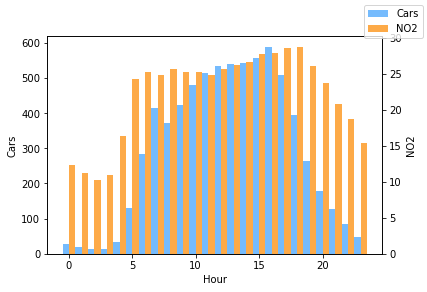

In [87]:
# NO2 in relation to hourly cars
def cars_hourly(data):
    # array for 24 hours for "Cars-Total"
    cars = np.zeros(24)
    cars_sample_counter = np.zeros(24)
    # array for 24 hours for "NO2"
    no2 = np.zeros(24)
    cars_sample_counter = np.zeros(24)
    # iterate over data and put NO2 and Cars-Total in arrays
    for i in range(len(data)):
        # get hour from column "DateTime" like this  "2019-01-02 04:00:00"
        hour = data.iloc[i]["DateTime"].hour
        cars[hour] += data["Cars-Total"][i]
        cars_sample_counter[hour] += 1
        no2[hour] += data["NO2-ug-per-m3"][i]
        cars_sample_counter[hour] += 1

    # to erase the different sample sizes we divide by the sample size
    cars = cars / cars_sample_counter
    no2 = no2 / cars_sample_counter

    # plot "cars" and "no2" as lines in ax1 and ax2 but in one graph
    # "no2" is red
    plt.figure(figsize=(6,3))
    fig, ax1 = plt.subplots()
    ax1.bar(np.arange(len(cars))-0.25,cars, color="xkcd:sky blue", width=0.5, label="Cars")
    ax1.set_xlabel("Hour")
    ax1.set_ylabel("Cars")
    ax2 = ax1.twinx()
    ax2.bar(np.arange(len(no2)) + 0.25,no2, color="xkcd:light orange", width=0.5, label="NO2")
    ax2.set_ylabel("NO2")
    fig.legend()
    plt.show()

cars_hourly(data)

In this plot we can see the hourly averages for both the level of NO2 in the atmosphere as well as the number of cars on the road.

While both values peak at midday, NO2 rises earlier than the number of cars and also stays high for quite a bit.

This means there is likely another factor, but lets first look at weekly patterns

<Figure size 432x288 with 0 Axes>

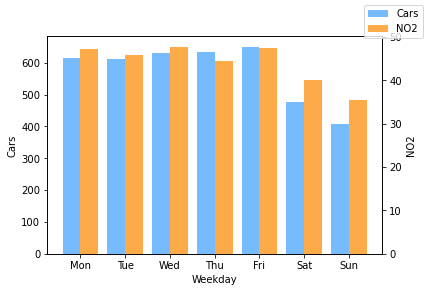

In [88]:
# NO2 in relation to cars on week days
def cars_weekdays(data):
    # array for 7 days of the week
    cars = np.zeros(7)
    cars_sample_counter = np.zeros(7)
    # array for 7 days of the week
    no2 = np.zeros(7)
    no2_sample_counter = np.zeros(7)
    # iterate over data and put NO2 and Cars-Total in arrays
    for i in range(len(data)):
        # get weekday from column "DateTime" like this  "2019-01-02 04:00:00"
        weekday = data.iloc[i]["DateTime"].weekday()
        cars[weekday] += data["Cars-Total"][i]
        cars_sample_counter[weekday] += 1
        no2[weekday] += data["NO2-ug-per-m3"][i]
        no2_sample_counter[weekday] += 1

    # to erase the different sample sizes we divide by the sample size
    cars = cars / cars_sample_counter
    no2 = no2 / no2_sample_counter

    # plot "cars" and "no2" as lines in ax1 and ax2 but in one graph
    # "no2" is red
    plt.figure()
    fig, ax1 = plt.subplots()
    ax1.bar(np.arange(len(cars))-0.20,cars, width=0.4, color="xkcd:sky blue", label="Cars")
    ax1.set_xlabel("Weekday")
    ax1.set_ylabel("Cars")
    ax2 = ax1.twinx()
    ax2.bar(np.arange(len(no2)) + 0.20,no2,width=0.4, color="xkcd:light orange", label="NO2")
    ax2.set_ylabel("NO2")
    fig.legend(loc="upper right")
    plt.xticks(ticks=np.arange(7),labels=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
    plt.show()
cars_weekdays(data)


In these weekly averages, we can see that both traffic and air pollution get better on weekends though there does seem to be some base load that keeps NO2 high.

To find out more, we should try to glance at some factors from a whole year perspective.

In [109]:
import numpy as np

def yearmap(data, column, title="", cmap="cool") :
    # array with 365 days on axis 0 and 24 hours on axis 1
    array = np.zeros((24, 365))
    # iterate over data and put NO2 and Cars-Total in array
    for i in range(len(data)):
        date_time = data.iloc[i]["DateTime"]
        day_of_year = date_time.dayofyear
        hour = date_time.hour

        array[hour][day_of_year-1] += column[i]

    # plot matrix as square heatmap
    plt.figure(figsize=(60, 5))
    plt.imshow(array, cmap=cmap, interpolation="nearest",
               aspect=(365/24)/6)
    plt.colorbar()
    ticks = [0]
    last = 0
    from calendar import monthrange
    for i in range(1,12):
        last += monthrange(2019, i)[1]
        ticks.append(last)
    plt.xticks(ticks=np.array(ticks), labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
    plt.title(title)

    plt.show()


So, how much NO2 is measured over the amount of cars

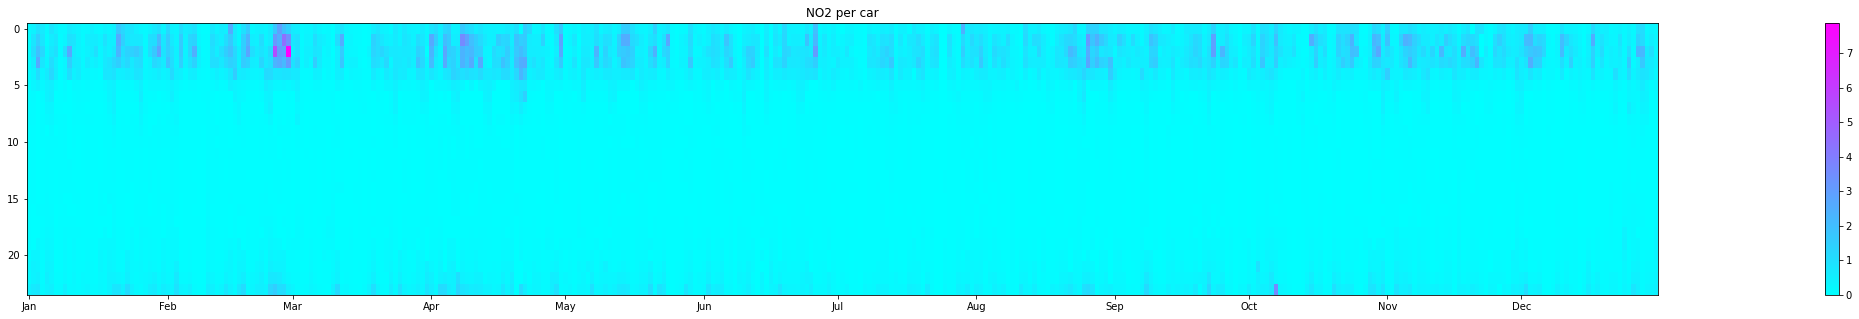

In [110]:
yearmap(data, data["NO2-ug-per-m3"]/data["Cars-Total"], "NO2 per car")

What if it's not cars, but ships on the Kieler Förde?

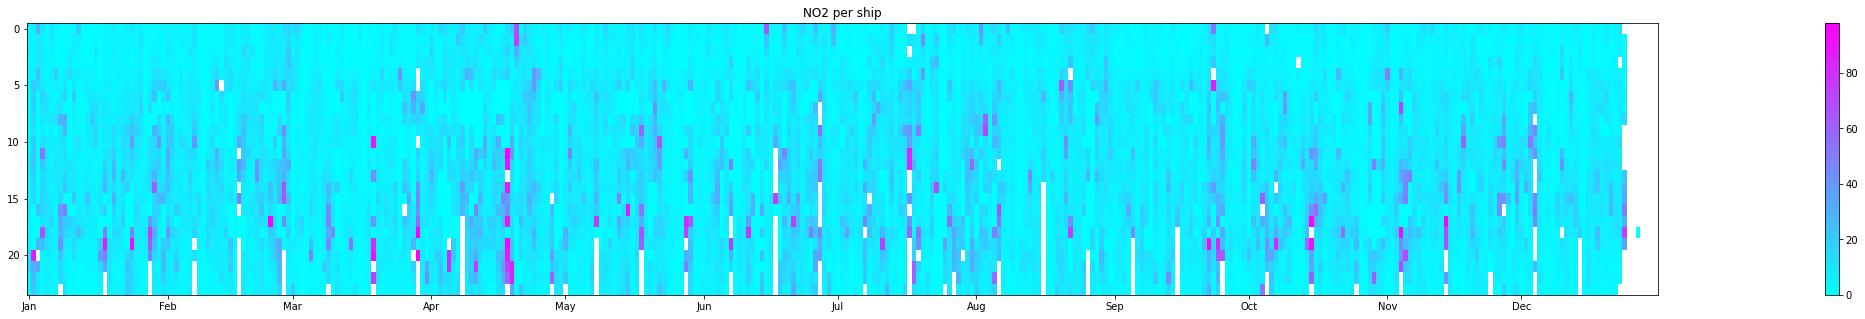

In [111]:
yearmap(data, data["NO2-ug-per-m3"]/data["Number of vessels"], "NO2 per ship")

Both graphs do not really show any serious correlation. Let's further explore the dataset. We also have weather information.

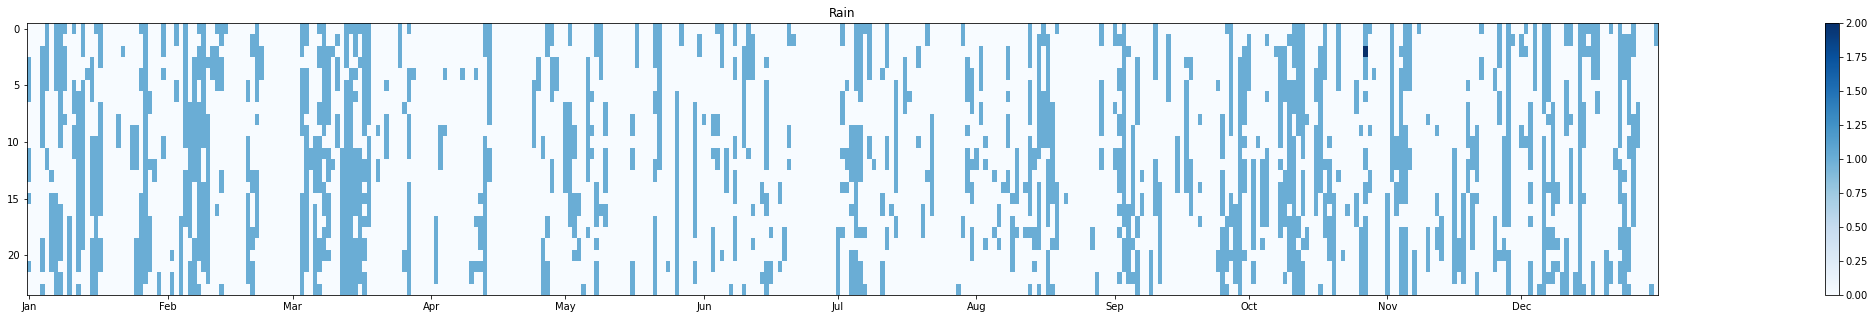

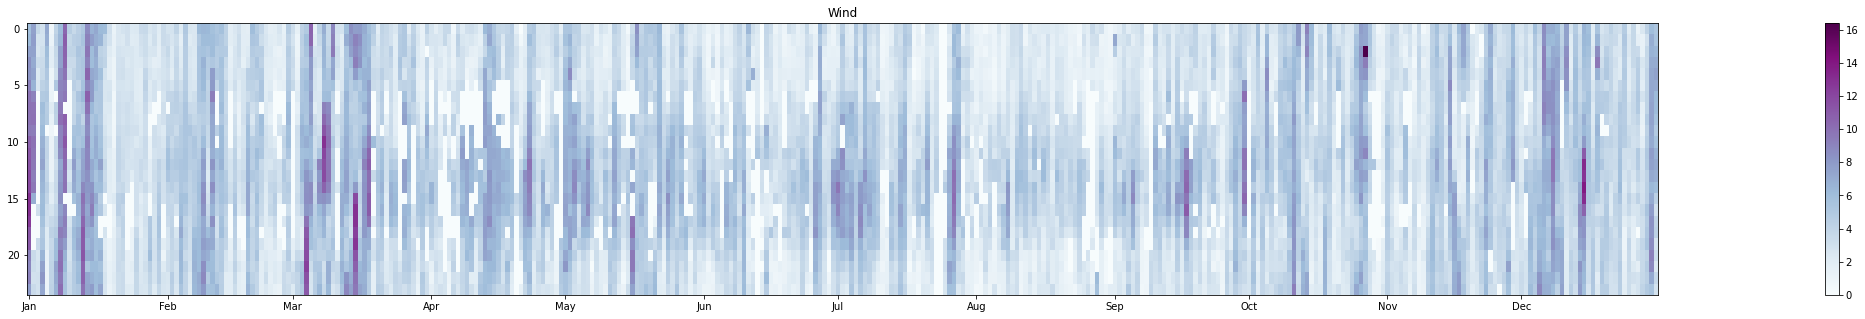

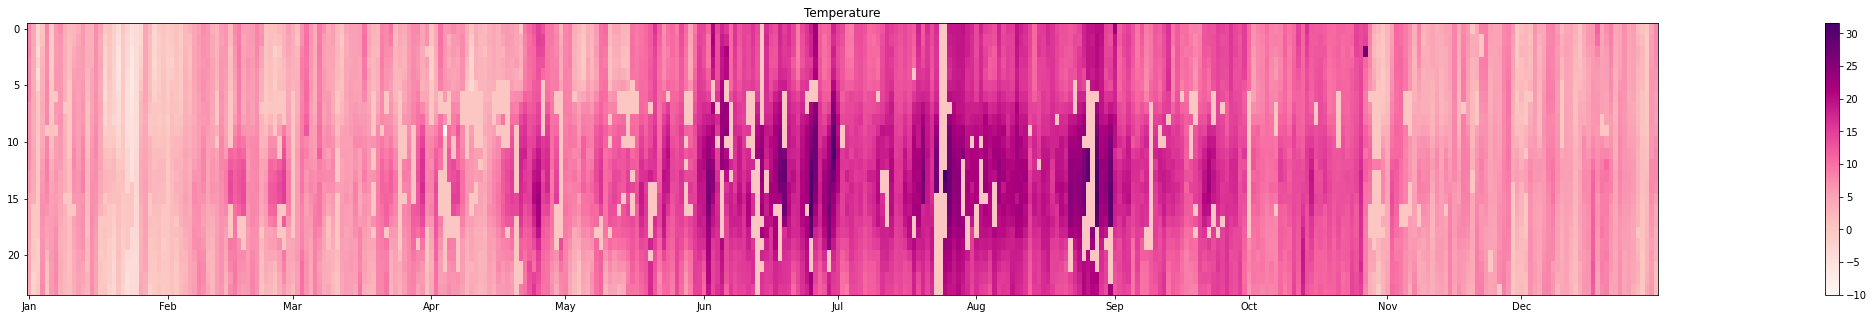

In [112]:
yearmap(data, data["did_it_rain"], "Rain","Blues")
yearmap(data, data["wind_meters_per_second"], "Wind", "BuPu")
yearmap(data, data["air_temp_deg_c"], "Temperature", "RdPu")


Wind Speed is interesting, since it could "blow away" pollution before it can be measured. We could also try to find a direct correlation between NO2 and cars.

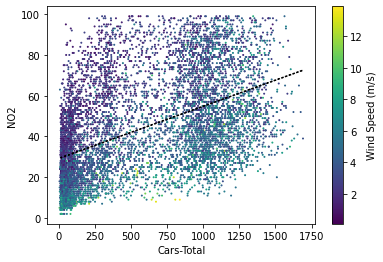

'Color: Wind speed (Strong wind -> Less NO2 measured)'

In [113]:
plt.figure()
plt.scatter(data["Cars-Total"], data["NO2-ug-per-m3"], s=1, c=data["wind_meters_per_second"])
m,c = np.polyfit(data["Cars-Total"], data["NO2-ug-per-m3"], 1)
plt.plot(data["Cars-Total"], m*data["Cars-Total"]+c, c="black", linestyle="dotted")
plt.xlabel("Cars-Total")
plt.ylabel("NO2")
cb = plt.colorbar()
cb.set_label("Wind Speed (m/s)")
plt.show()
display("Color: Wind speed (Strong wind -> Less NO2 measured)")

So there is some correlation between cars and NO2. The graph isn't exactly diagonal, but still. How about boats?

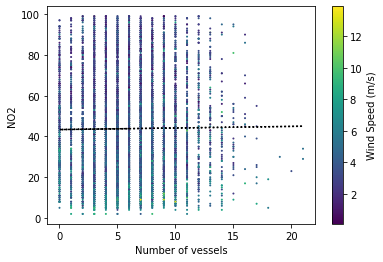

In [117]:
plt.figure()
plt.scatter(data["Number of vessels"], data["NO2-ug-per-m3"], s=1, c=data["wind_meters_per_second"])
m,c = np.polyfit(data["Number of vessels"], data["NO2-ug-per-m3"], 1)
plt.plot(data["Number of vessels"], m*data["Number of vessels"]+c, c="black", linestyle="dotted")
plt.xlabel("Number of vessels")
plt.ylabel("NO2")
cb = plt.colorbar()
cb.set_label("Wind Speed (m/s)")
plt.show()

Iiinteresting. A little correlation. But not a lot!

Let's see if weather influences traffic.

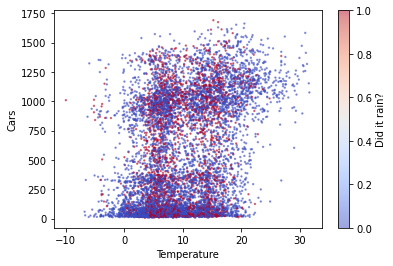

'(Color: red=rain, blue=dry) Car traffic does not seem to be correlated with temperature'

In [115]:
plt.figure()
plt.scatter(data["air_temp_deg_c"], data["Cars-Total"], s=2, c=data["did_it_rain"],alpha=0.5, cmap="coolwarm")
cb = plt.colorbar()
cb.set_label("Did it rain?")
plt.xlabel("Temperature")
plt.ylabel("Cars")
plt.show()
display("(Color: red=rain, blue=dry) Car traffic does not seem to be correlated with temperature")

And fuel price?

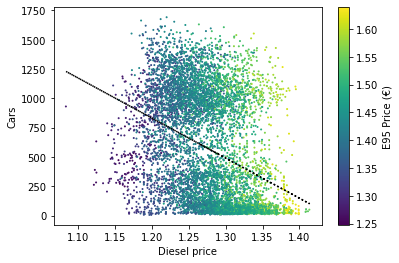

'(Color: gas price) Cheaper diesel fuel means more traffic'

In [102]:
plt.figure()
plt.scatter(data["diesel"], data["Cars-Total"], s=1, c=data["e5"])
m,c = np.polyfit(data["diesel"], data["Cars-Total"], 1)
plt.plot(data["diesel"], m*data["diesel"]+c, c="black", linestyle="dotted")
plt.xlabel("Diesel price")
plt.ylabel("Cars")
cb = plt.colorbar()
cb.set_label("E95 Price (€)")
plt.show()
display("(Color: gas price) Cheaper diesel fuel means more traffic")

Is NO2 weather dependent?

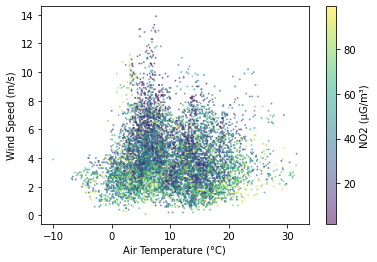

In [105]:
plt.figure()
plt.scatter(data["air_temp_deg_c"], data["wind_meters_per_second"], s=1, alpha=0.5, c=data["NO2-ug-per-m3"])
plt.xlabel("Air Temperature (°C)")
plt.ylabel("Wind Speed (m/s)")
cb = plt.colorbar()
cb.set_label("NO2 (µG/m³)")
plt.show()

Okay so right now we don't really have a good clue whats going on. There seems to be some correlation between cars, windspeed and NO2, but lets look at that in more detail.

We can do a very basic correlation analysis by running a linear regression and plotting each factor as a fraction of the length of the vector. This linear regression also provides a good base case for future modelling. We can blacklist the one-hot-encodings for now.

In [129]:
onehots = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'January', 'February', 'March', 'April', 'May',
       'June', 'July', 'August', 'September', 'October', 'November',
       'December']

cdata = data.drop(onehots, axis=1)
cdata.head()

X = cdata.drop(["NO2-ug-per-m3", "DateTime"], axis=1).to_numpy()
Y = cdata["NO2-ug-per-m3"]

In [136]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, Y)

22


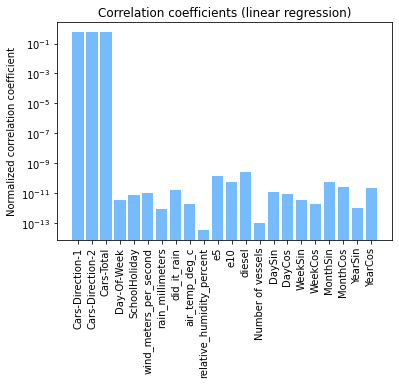

In [151]:
# Normalize the coefficient vector and then take the absolute to get a rough measure of incluence
coeff_influence = np.abs(reg.coef_ / np.linalg.norm(reg.coef_))
print(len(coeff_influence))
plt.figure()
plt.bar(x=range(len(coeff_influence)), height=coeff_influence, log=True,color="xkcd:sky blue")
plt.xticks(ticks=range(len(coeff_influence)),labels=cdata.drop(["NO2-ug-per-m3", "DateTime"], axis=1).columns, rotation='vertical')
plt.title("Correlation coefficients (linear regression)")
plt.ylabel("Normalized correlation coefficient")
plt.show()

By the way, how good are we already?

In [152]:
from sklearn.metrics import mean_absolute_error
Ypred = reg.predict(X)
mean_absolute_error(Y, Ypred)

14.658429066379217

Since NO2 accumulation is a natural process and natural processes oftentimes exhibit nonlinearities (especially saturation effects), it might be interesting to try a logistic regression and see if we get better with that

In [232]:
from sklearn.linear_model import LogisticRegression
logireg = LogisticRegression(solver='liblinear',penalty='l2', max_iter=500).fit(X, Y)
Ypred_logi = logireg.predict(X)
mean_absolute_error(Y, Ypred_logi)

16.348733233979136

So that didn't quite work out.

Something fun we can do is to do a linear regression for each parameter and plot its predictive ability. This should look something like the inverse of the factors of the linear regression (something something composability).

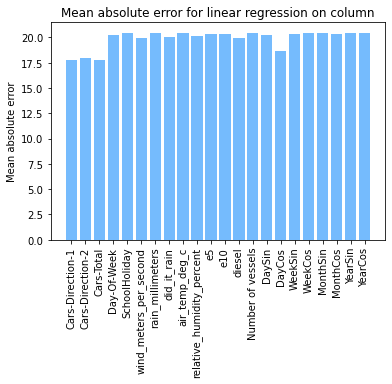

In [162]:
maes = []
pdata = cdata.drop(["NO2-ug-per-m3", "DateTime"], axis=1)
for col in pdata.columns:
    col_reg = LinearRegression().fit(cdata[col].to_numpy().reshape(-1, 1),cdata["NO2-ug-per-m3"])
    col_pred = col_reg.predict(cdata[col].to_numpy().reshape(-1, 1))
    col_mae = mean_absolute_error(Y, col_pred)
    maes.append(col_mae)
                                     
plt.figure()
plt.bar(x=range(len(maes)), height=maes,color="xkcd:sky blue")
plt.xticks(ticks=range(len(maes)),labels=pdata.columns, rotation='vertical')
plt.title("Mean absolute error for linear regression on column")
plt.ylabel("Mean absolute error")
plt.show()

So right now it seems like cars are our best bet. Everything else is probably correlated to cars.

(23, 23) (23,)


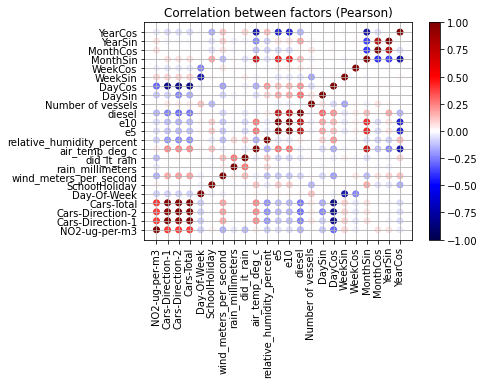

In [200]:
correlation_matrix = cdata.corr().to_numpy()
plt.figure()
#plt.imshow(correlation_matrix, cmap="cool", interpolation="nearest")
ticks=np.arange(len(cdata.corr().columns))
print(correlation_matrix.shape, ticks.shape)
factors = pd.DataFrame(columns=["X","Y","C"])
for x in ticks:
    for y in ticks:
        factors.loc[len(factors.index)] = [x,y,correlation_matrix[x,y]]
factors
minf = np.min(correlation_matrix)
maxf = np.max(correlation_matrix)
scalef = maxf - minf
plt.scatter(factors["X"], factors["Y"], c=factors["C"], alpha = 0.5 + (np.abs(factors["C"] / 2.0)), cmap="seismic", vmin=-1, vmax=1)
labels = cdata.corr().columns
plt.xticks(ticks,labels, rotation='vertical')
plt.yticks(ticks,labels)
plt.grid(alpha=1)
plt.title("Correlation between factors (Pearson)")
plt.colorbar()
plt.show()

So there are some interesting correlations in the data. We found the weekly and daily patterns in the beginning. The linear regression has also given the impression that actually, cars are the main factor and little else has any influence.

Bonus: When is the best time to fuel up?

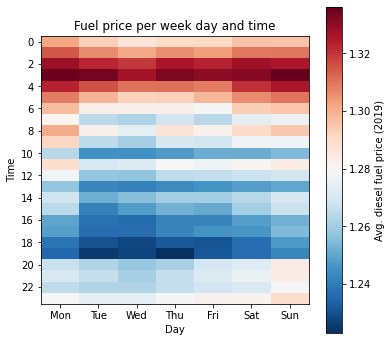

In [219]:
days_hour_fuel = np.zeros((7,24))
entries = np.zeros((7,24))
for idx, row in data.iterrows():
    day = row["DateTime"].weekday()
    hour = row["DateTime"].hour
    fuelprice = row["diesel"]
    entries[day, hour] += 1
    days_hour_fuel[day, hour] += fuelprice

days_hour_fuel /= entries

plt.figure(figsize=(6,6))
plt.imshow(days_hour_fuel.T, aspect=7.0/24, cmap="RdBu_r")
plt.xticks(ticks=np.arange(7), labels=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
plt.yticks(ticks=np.arange(0,24,2))
plt.ylabel("Time")
plt.xlabel("Day")
#plt.scatter(x=data["Day-Of-Week"], y= np.arcsin(data["DaySin"]), c=data["diesel"], alpha=0.1)
cb =plt.colorbar()
cb.set_label("Avg. diesel fuel price (2019)", rotation="vertical")
plt.title("Fuel price per week day and time")
plt.show()